# MACHINE LEARNING DO ZERO EM PYTHON

# INTRODUÇÃO

# O QUE É MACHINE LEARNING? 

- Como o próprio nome já diz, estamos criando máquinas que aprendam (no caso, com dados);
- Exemplo 1: Um filtro de spam que é capaz de identificar caracteres "estranhos" e que sejam indícios de que aquele e-mail é um spam é um programa de aprendizado de máquinas. Exemplo 2: Um programa que seja capaz de identificar se uma avaliação está elogiando ou insultando o estabelecimento também é um aprendizado de máquinas. Por isso aprendizado de máquinas é um campo da Inteligência Artificial - estamos tratando de máquinas que aprendem.
- Polêmica: Por mais que ainda exista relutância de algumas pessoas, machine learning não é estatística/matemática com um nome mais chique;
- Machine learning é sobre predições, pouco esforço humano e aprendizado com os dados;
- Cases famosos: modelo de predição de assintomáticos com Covid; competição para criação do modelo de recomendação da Netflix; predição de Alzheimer.
- Principais tipos de aprendizado: Supervisionado e Não-Supervisionado.

O MERCADO DE MACHINE LEARNING: <br>
- Muito recente, em alto crescimento;
- Alta remuneração (não aquelas dos jornais, mas ainda alta se comparada com a média de outras áreas);
- Áreas e cargos ainda em construção, em constante mudança;
- Foco em aprendizado constante: 90% dos cientistas de dados  (Coursera, Datacamp, Udacity, Alura, etc).

## 1. CARREGA BIBLIOTECAS

In [192]:
# Para manipulacao dos dados
import pandas as pd
import numpy as np

# para graficos
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz as sv 

# para modelagem
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid, KFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


#### Settings ###########

pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 20
pd.options.display.max_columns = 1000
pd.options.display.precision = 2
pd.options.display.float_format = "{:,.2f}".format
plt.style.use("classic")

## 2. PRIMEIRAS IMPRESSÕES

Mais sobre os campos do dataset:
- Age (numeric)
- Sex (text: male, female)
- Job (numeric: 0 — unskilled and non-resident, 1 — unskilled and resident, 2 — skilled, 3 — highly skilled)
- Housing (text: own, rent, or free)
- Saving accounts (text — little, moderate, quite rich, rich)
- Checking account (numeric, in DM — Deutsch Mark)
- Credit amount (numeric, in DM)
- Duration (numeric, in month)
- Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

In [193]:
# carrega dataset
df = pd.read_csv("C:/Users/tarsi/OneDrive/Documentos/Data Science/Machine-Learn/Data/german_credit_data.csv", index_col=0)  # sep = ';', decimal = ','

In [194]:
# ve as primeiras linhas
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [195]:
# ve as ultimas linhas
df.tail()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,27,male,2,own,moderate,moderate,4576,45,car,good


In [196]:
df.head(10)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
5,35,male,1,free,NaN,NaN,9055,36,education,good
6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment,good
7,35,male,3,rent,little,moderate,6948,36,car,good
8,61,male,1,own,rich,NaN,3059,12,radio/TV,good
9,28,male,3,own,little,moderate,5234,30,car,bad


In [197]:
# informação das variáveis (tipo, valores nulos, memoria que o objeto ta consumindo, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [198]:
df.shape

(1000, 10)

In [199]:
# f-string
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset possui 1000 linhas e 10 colunas.


In [200]:
# Como acessar os valores de shape:
df.shape[1]

10

In [201]:
# Acessar elementos: loc e o iloc
df.iloc[0:4, 0:7]  # repara: está acessando um intervalo aberto na direita

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount
0,67,male,2,own,NaN,little,1169
1,22,female,2,own,little,moderate,5951
2,49,male,1,own,little,NaN,2096
3,45,male,2,free,little,little,7882


In [202]:
# outro modo de acessar elementos, usando nome da coluna
df.loc[0:3, "Age"]

0    67
1    22
2    49
3    45
Name: Age, dtype: int64

In [203]:
# se quiser trazeer mais de uma coluna
df.loc[0:3, ["Age", "Sex", "Job"]]

,Age,Sex,Job
0,67,male,2
1,22,female,2
2,49,male,1
3,45,male,2


In [204]:
# também pode ir pelo nome da coluna como índice
novo_dataframe = df[["Age", "Housing"]]
novo_dataframe.head()

,Age,Housing
0,67,own
1,22,own
2,49,own
3,45,free
4,53,free


In [205]:
# Estatística descritiva
df.describe()

,Age,Job,Credit amount,Duration
count,"1,000.00","1,000.00","1,000.00","1,000.00"
mean,35.55,1.90,"3,271.26",20.90
std,11.38,0.65,"2,822.74",12.06
min,19.00,0.00,250.00,4.00
25%,27.00,2.00,"1,365.50",12.00
50%,33.00,2.00,"2,319.50",18.00
75%,42.00,2.00,"3,972.25",24.00
max,75.00,3.00,"18,424.00",72.00


In [206]:
# E se quiser a estatística descritiva por grupo?
df.groupby("Sex")["Age", "Credit amount", "Duration"].mean()

C:\Users\tarsi\AppData\Local\Temp\ipykernel_23816\3725909598.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Sex")["Age", "Credit amount", "Duration"].mean()


,Age,Credit amount,Duration
Sex,,,
female,32.80,"2,877.77",19.44
male,36.78,"3,448.04",21.56


In [207]:
df.groupby("Purpose")["Age", "Credit amount", "Duration"].mean()

C:\Users\tarsi\AppData\Local\Temp\ipykernel_23816\911058267.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby("Purpose")["Age", "Credit amount", "Duration"].mean()


,Age,Credit amount,Duration
Purpose,,,
business,35.48,"4,158.04",26.94
car,37.14,"3,768.19",20.81
domestic appliances,34.25,"1,498.00",16.83
education,38.29,"2,879.20",19.68
furniture/equipment,32.46,"3,066.99",19.29
radio/TV,34.70,"2,487.65",20.05
repairs,38.55,"2,728.09",19.09
vacation/others,39.92,"8,209.33",32.33


In [208]:
# % de missing
df.isna().mean() # se quisesse preencher, poderia usar fillna() 

# (ver post 'Classificador de Estilo Musical' lá no blog)

Age                0.00
Sex                0.00
Job                0.00
Housing            0.00
Saving accounts    0.18
Checking account   0.39
Credit amount      0.00
Duration           0.00
Purpose            0.00
Risk               0.00
dtype: float64

In [209]:
# total de missing por variavel
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [210]:
# olhando as variáveis categóricas
df.Housing.value_counts()

own     713
rent    179
free    108
Name: Housing, dtype: int64

In [211]:
df.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

In [212]:
# ver o percentual:
df.Housing.value_counts(normalize=True).sort_index()

free   0.11
own    0.71
rent   0.18
Name: Housing, dtype: float64

In [213]:
# pegando os nomes das colunas
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [214]:
# Filtros
# Query para lógica
df.query("Age > 70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
186,74,female,3,free,little,moderate,5129,9,car,bad
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
536,75,female,3,own,NaN,little,1374,6,car,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [215]:
homens_velhos = df.query(" Age > 70 & Sex == 'male' ")
homens_velhos.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
330,75,male,3,free,little,little,6615,24,car,good
430,74,male,1,own,little,NaN,3448,5,business,good
606,74,male,3,own,little,NaN,4526,24,business,good
756,74,male,0,own,little,rich,1299,6,car,good


In [216]:
# Método para tentar inferir se a variável é categórica
provavel_categorica = {}

for var in df.columns:
    provavel_categorica[var] = 1.0 * df[var].nunique() / df[var].count() < 0.03

provavel_categorica

{'Age': False,
 'Sex': True,
 'Job': True,
 'Housing': True,
 'Saving accounts': True,
 'Checking account': True,
 'Credit amount': False,
 'Duration': False,
 'Purpose': True,
 'Risk': True}

In [217]:
# relembrando
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [218]:
df["Target"] = np.where(df["Risk"] == "bad", 1, 0)
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,1
2,49,male,1,own,little,NaN,2096,12,education,good,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,0
4,53,male,2,free,little,little,4870,24,car,bad,1


In [219]:
df.drop("Risk", axis=1, inplace=True)

In [220]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Target
0,67,male,2,own,NaN,little,1169,6,radio/TV,0
1,22,female,2,own,little,moderate,5951,48,radio/TV,1
2,49,male,1,own,little,NaN,2096,12,education,0
3,45,male,2,free,little,little,7882,42,furniture/equipment,0
4,53,male,2,free,little,little,4870,24,car,1
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,0
996,40,male,3,own,little,little,3857,30,car,0
997,38,male,2,own,little,NaN,804,12,radio/TV,0
998,23,male,2,free,little,little,1845,45,radio/TV,1


In [221]:
df.Target.value_counts(normalize=True)

0   0.70
1   0.30
Name: Target, dtype: float64

## 3. ANÁLISE EXPLORATÓRIA

PLOT COM PANDAS

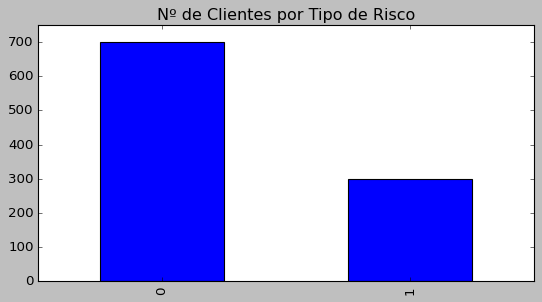

In [222]:
_ = plt.figure(figsize=(8, 4))
_ = df.Target.value_counts().plot(kind="bar")
_ = plt.title("Nº de Clientes por Tipo de Risco")
_ = plt.ylim(0, 750)

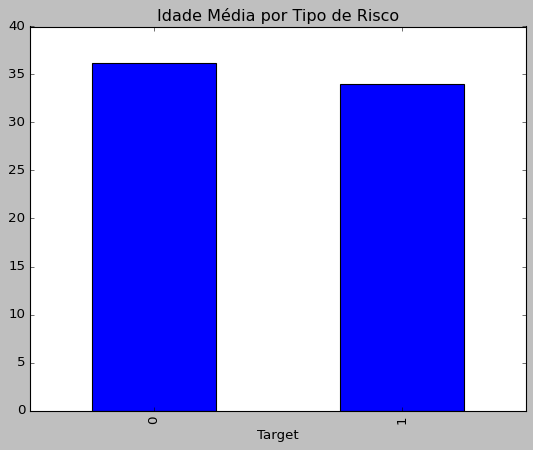

In [223]:
_ = df.groupby("Target")["Age"].mean().plot(kind="bar")
_ = plt.title("Idade Média por Tipo de Risco")

PLOTS COM MATPLOTLIB (FOCO NA HIERARQUIA)

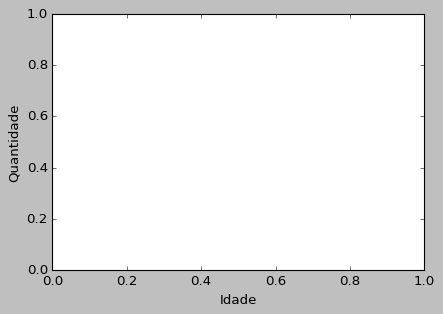

In [224]:
# Veja como o gráfico vai sendo construído por partes
_ = plt.figure(figsize=(6, 4))
_ = plt.xlabel("Idade")
_ = plt.ylabel("Quantidade")

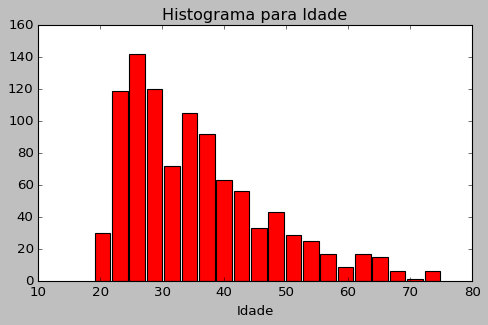

In [225]:
# Note que vamos adicionando elementos ao desenho
_ = plt.figure(figsize=(7, 4))
_ = plt.hist(data=df, x="Age", bins=20, rwidth=0.9, color="red")
_ = plt.xlabel("Idade")
_ = plt.title("Histograma para Idade")

PLOT COM SEABORN

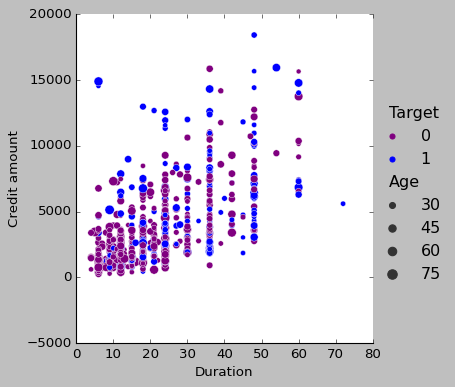

In [226]:
_ = sns.relplot(
    x="Duration",
    y="Credit amount",
    hue="Target",
    palette=["purple", "blue"],
    size="Age",
    data=df,
)

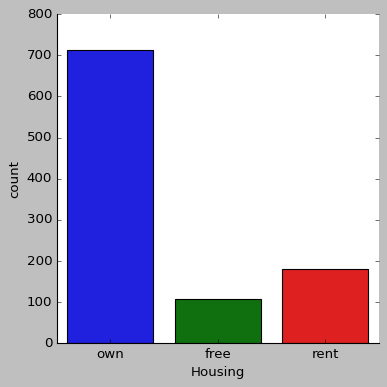

In [227]:
# Gráfico de contagem por categoria
_ = sns.catplot(x="Housing", kind="count", data=df)

## 4. MODELAGEM DE MACHINE LEARNING: RANDOM FOREST

In [228]:
# # Dashboard com uma linha de codigo
# import sweetviz as sv

# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

[Dataset](https://estatsite.com.br/2016/06/11/1970/)

RF combina a simplicidade das árvores de decisão com a flexibilidade de aprender de amostras novas (menor risco de overfitting).

Como funciona a Random Forest:
- Coletamos uma amostra do dataset original, podendo haver repetições;
- Começamos a construção de uma árvore de decisão a partir do dataset gerado pela amostragem acima;
- Na hora de selecionar qual a feature do primeiro nó (=root node), consideramos um subconjunto das features disponíveis no dataset;
- Na hora de escolher a feature do nó seguinte, também selecionamos a partir de um subconjunto das variáveis que restaram;
- Seguimos fazendo isso até finalizar a árvore;
- Note: o subconjunto de features pode ter tamanho 2, 3, ..., n. É preciso escolher o que gera melhor desempenho;
- Pegue o processo e repita centenas de vezes. I.e., construímos centenas de árvores de decisão.
- Como usamos as árvores?
- Pegue o primeiro data point (o primeiro "indivíduo" do nosso conjunto de dados) e rode ele na primeira árvore. Suponha que a gente esteja construindo um modelo para previsão de bom ou mau pagador. A previsão da primeira árvore é que o primeiro indivíduo é um mau pagador. Aí, rodamos para a segunda árvore. Ela também diz que ele será um bom pagador. Repetimos isso para todas árvores. Vemos qual opção recebeu mais votos. Como a maioria das árvores teve como previsão que o indivíduo seria um bom pagador, nossa previsão é que ele será um bom pagador.

Termo importante:
- Ensemble learning: Uso de múltiplos algoritmos para obter melhor desempenho preditivo.

In [229]:
# Vamos listar as features que vamos utilizar
features = ["Age", "Job", "Credit amount", "Purpose", "Housing", "Duration"]
target = "Target"

In [230]:
# Agora, dividimos antes de qualquer pré-processamento
X = df[features]  # Features
y = df[target]  # Labels

# Divide em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=999
)

In [231]:
# Precisamos tratar as variáveis categóricas (Cuidado quando for numérica)
cat_features = ["Job", "Housing", "Purpose"]
num_features = ["Age", "Credit amount", "Duration"]

In [232]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=cat_features)

X_train = encoder.fit_transform(X_train)

X_train.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
763,30,1,0,0,0,12680,1,0,0,0,0,0,0,0,1,0,0,21
534,25,0,1,0,0,3105,0,1,0,0,0,0,0,0,0,1,0,24
86,27,0,1,0,0,1295,0,0,1,0,0,0,0,0,0,1,0,18
927,39,0,1,0,0,10297,1,0,0,0,0,0,0,0,1,0,0,48
134,21,0,1,0,0,10144,0,1,0,0,0,0,0,0,0,1,0,60


In [233]:
X_test = encoder.transform(X_test)

X_test.head()

,Age,Job_1,Job_2,Job_3,Job_4,Credit amount,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8,Housing_1,Housing_2,Housing_3,Duration
842,23,0,1,0,0,1943,0,0,0,0,1,0,0,0,0,1,0,18
68,37,0,1,0,0,1819,0,0,0,0,0,0,0,1,1,0,0,36
308,24,0,1,0,0,1237,0,0,1,0,0,0,0,0,0,1,0,8
881,48,0,1,0,0,9277,1,0,0,0,0,0,0,0,1,0,0,24
350,23,0,1,0,0,1236,0,0,0,0,0,0,1,0,0,0,1,9


In [234]:
clf_RF = RandomForestClassifier()  # instanciar (= inicializar, criar o objeto)
clf_RF.fit(X_train, y_train)  # treina o modelo

RandomForestClassifier()

In [235]:
# aplica no teste
y_pred = clf_RF.predict(X_test)

y_pred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [236]:
# metricas de avaliacao
from sklearn.metrics import accuracy_score

print("Acurácia: " + str(accuracy_score(y_test, y_pred)))  # acertos ao todo

from sklearn.metrics import f1_score

print(
    "F1 Score: {}".format(f1_score(y_test, y_pred))
)  # indica poucos falsos positivos e falsos negativos, quanto mais próximo de 1, melhor

Acurácia: 0.6266666666666667
F1 Score: 0.2432432432432432


In [237]:
from sklearn.metrics import confusion_matrix

print("Matriz de Confusão : /n" + str(confusion_matrix(y_test, y_pred)))

Matriz de Confusão : /n[[170  29]
 [ 83  18]]


In [238]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [239]:
print("True Positive: " + str(tp))
print("True Negative: " + str(tn))
print("False Positive: " + str(fp))
print("False Negative: " + str(fn))

True Positive: 18
True Negative: 170
False Positive: 29
False Negative: 83


In [240]:
21 / (21 + 27)

0.4375

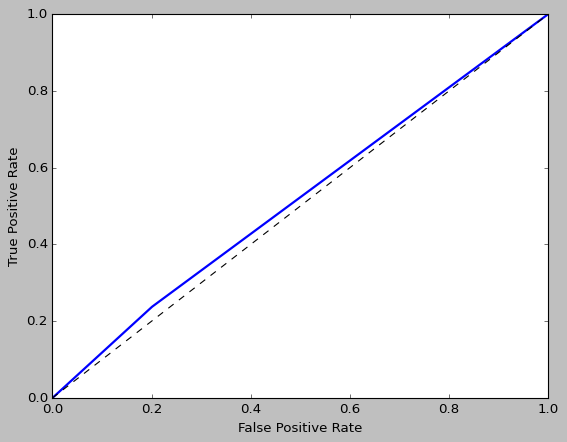

In [241]:
# CURVA ROC: calcula fpr e tpr para vários limiares
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# probabilidades
# probs = clf_RF.predict_proba(X_test)

y_scores = cross_val_predict(clf_RF, X_test, y_test)

# obtem fpr, tpr e limites
fpr, tpr, thresholds = roc_curve(y_test, y_scores)


def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


plot_roc_curve(fpr, tpr)

In [242]:
clf_RF.feature_importances_

Feature: Age                                 |▉         | [  9%]   04:24 -> (44:04 left)


array([0.23835027, 0.02062752, 0.02245055, 0.02175457, 0.00633967,
       0.31468809, 0.03039439, 0.02150203, 0.02125881, 0.01739393,
       0.01272215, 0.00405747, 0.00696789, 0.01615306, 0.01584342,
       0.02090142, 0.01519155, 0.19340321])

In [243]:
# FEATURE IMPORTANCE
feature_imp = pd.Series(clf_RF.feature_importances_, index=X_train.columns).sort_values(
    ascending=False
)
feature_imp

Credit amount   0.31
Age             0.24
Duration        0.19
Purpose_1       0.03
Job_2           0.02
Job_3           0.02
Purpose_2       0.02
Purpose_3       0.02
Housing_2       0.02
Job_1           0.02
Purpose_4       0.02
Purpose_8       0.02
Housing_1       0.02
Housing_3       0.02
Purpose_5       0.01
Purpose_7       0.01
Job_4           0.01
Purpose_6       0.00
dtype: float64

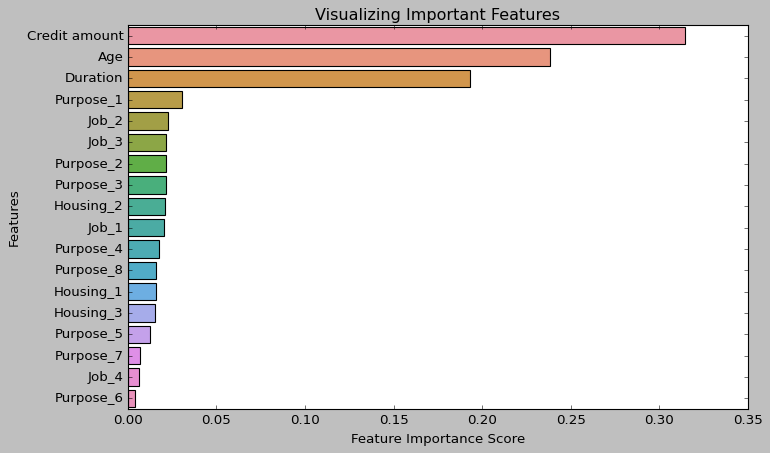

In [244]:
# Creating a bar plot
_ = plt.figure(figsize=(10, 6))
_ = sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
_ = plt.xlabel("Feature Importance Score")
_ = plt.ylabel("Features")
_ = plt.title("Visualizing Important Features")
_ = plt.savefig("rf_features.png")

In [245]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

# Tunando os hiperparâmetros:
model_params = {
    # randomly sample numbers from 4 to 204 estimators
    "n_estimators": randint(4, 200),
    # normally distributed max_features, with mean .25 stddev 0.1, bounded between 0 and 1
    "max_features": truncnorm(a=0, b=1, loc=0.25, scale=0.1),
    # uniform distribution from 0.01 to 0.2 (0.01 + 0.199)
    "min_samples_split": uniform(0.01, 0.199),
}

# create random forest classifier model
rf_model = RandomForestClassifier()

# set up random search meta-estimator
# this will train 100 models over 5 folds of cross validation (500 models total)
clf = RandomizedSearchCV(rf_model, model_params, n_iter=10, cv=5, random_state=1)

# train the random search meta-estimator to find the best model out of 100 candidates
model = clf.fit(X_train, y_train)

# print winning set of hyperparameters
from pprint import pprint

pprint(model.best_estimator_.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.2846112054232423,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 0.08719423749123947,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 138,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [246]:
# Qual combinação de parâmetros trouxe melhor resultado:
model.best_estimator_

RandomForestClassifier(max_features=0.2846112054232423,
                       min_samples_split=0.08719423749123947, n_estimators=138)

In [247]:
clf_random = RandomForestClassifier(
    max_features=0.3124639258611636,
    min_samples_split=0.05068599769657197,
    n_estimators=160,
)

clf_random.fit(X_train, y_train)

RandomForestClassifier(max_features=0.3124639258611636,
                       min_samples_split=0.05068599769657197, n_estimators=160)

In [248]:
y_pred_random = clf_random.predict(X_test)

print("Acurácia: " + str(accuracy_score(y_test, y_pred_random)))

print("F1 Score: {}".format(f1_score(y_test, y_pred_random)))

Acurácia: 0.6733333333333333
F1 Score: 0.24615384615384614
